In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import  date
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score as score
from sklearn.ensemble import ExtraTreesClassifier

In [85]:
df = pd.read_csv('US_Accidents_Dec19_IL-final.csv')

In [86]:
df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,Weather_Condition_Wintry Mix / Windy,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Weekday_Fri,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed
count,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,...,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000,20798.000000
mean,2.405472,41.857720,-88.037689,0.267641,47.420728,74.638667,29.492704,7.724288,9.839095,0.007746,...,0.000048,0.698673,0.301327,0.173334,0.195980,0.046110,0.035917,0.167853,0.190980,0.189826
std,0.563924,0.572189,0.463288,1.234290,20.570417,16.493200,0.401683,3.333467,5.337166,0.036446,...,0.006934,0.458845,0.458845,0.378545,0.396963,0.209729,0.186087,0.373744,0.393083,0.392173
min,1.000000,37.035700,-91.039238,0.000000,-20.900000,11.000000,28.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,41.809270,-88.111547,0.000000,31.000000,64.000000,29.210000,5.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,41.907555,-87.946533,0.000000,44.100000,78.000000,29.390000,10.000000,9.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,42.071868,-87.771451,0.084000,66.000000,88.000000,29.740000,10.000000,13.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,42.494910,-87.526572,35.160000,95.000000,100.000000,30.650000,25.000000,39.100000,1.760000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
type(df)


#df.info()

pandas.core.frame.DataFrame

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20798 entries, 0 to 20797
Columns: 187 entries, Severity to Weekday_Wed
dtypes: bool(12), float64(8), int64(167)
memory usage: 28.0 MB


In [89]:
##normalizing colms
type(df['Start_Lat'])

pandas.core.series.Series

In [90]:
def minmaxNormalize(data):
    
    min_max_scaler = preprocessing.MinMaxScaler()
    data = min_max_scaler.fit_transform(data)
    
    return  pd.DataFrame(data)
    

#df['Start_Lat'] = minmaxNormalize(df[['Start_Lat']].values.astype(float))

In [91]:
df['Distance(mi)'].describe()

count    20798.000000
mean         0.267641
std          1.234290
min          0.000000
25%          0.000000
50%          0.000000
75%          0.084000
max         35.160000
Name: Distance(mi), dtype: float64

In [92]:
#df['Start_Lng'] = pd.qcut(df['Start_Lng'], q=100)
#df['Start_Lat'] = pd.qcut(df['Start_Lat'], q=50)
#df['Distance(mi)'] = pd.qcut(df['Distance(mi)'], q=50)


In [93]:
#df['Start_Lng'] = minmaxNormalize(df[['Start_Lng']].values.astype(float))
df['Distance(mi)'] = minmaxNormalize(df[['Distance(mi)']].values.astype(float))
df['Temperature(F)'] = minmaxNormalize(df[['Temperature(F)']].values.astype(float))
df['Humidity(%)'] = minmaxNormalize(df[['Humidity(%)']].values.astype(float))
df['Pressure(in)'] = minmaxNormalize(df[['Pressure(in)']].values.astype(float))
df['Visibility(mi)'] = minmaxNormalize(df[['Visibility(mi)']].values.astype(float))
df['Wind_Speed(mph)'] = minmaxNormalize(df[['Wind_Speed(mph)']].values.astype(float))
df['Precipitation(in)'] = minmaxNormalize(df[['Precipitation(in)']].values.astype(float))
df['Hour'] = minmaxNormalize(df[['Hour']].values.astype(float))
df['Time_Taken'] = minmaxNormalize(df[['Time_Taken']].values.astype(float))
#df['Start_Lat'] = minmaxNormalize(df[['Start_Lat']].values.astype(float))





In [94]:
df['Start_Lng'].describe()

count    20798.000000
mean       -88.037689
std          0.463288
min        -91.039238
25%        -88.111547
50%        -87.946533
75%        -87.771451
max        -87.526572
Name: Start_Lng, dtype: float64

In [95]:
df['Start_Lat'].describe()

count    20798.000000
mean        41.857720
std          0.572189
min         37.035700
25%         41.809270
50%         41.907555
75%         42.071868
max         42.494910
Name: Start_Lat, dtype: float64

In [96]:
print(df['Weekday_Thu'])

0        0
1        0
2        0
3        0
4        1
        ..
20793    0
20794    0
20795    0
20796    0
20797    0
Name: Weekday_Thu, Length: 20798, dtype: int64


In [97]:
df_final = pd.get_dummies(df)


In [98]:
df_final.describe()
df_final = pd.DataFrame(df_final).fillna(0)

In [99]:
df_y = df_final['Severity']
df_x = df_final.drop(df[['Severity']], axis=1)

In [100]:
X_train, X_valid, y_train, y_valid = train_test_split(df_x,df_y, test_size = 0.15, random_state = 63)

In [101]:

model=RandomForestClassifier(n_estimators=120)
#model=SVC()
model.fit(X_train,y_train)

y_pred=model.predict(X_valid)
acc=accuracy_score(y_valid, y_pred)
print('F1 Score : ' + str(score(y_valid,y_pred,average='micro')))
print("acc",acc)



# Model Accuracy, how often is the classifier correct?
print("[Random forest algorithm] accuracy_score: {:.3f}.".format(acc))

F1 Score : 0.8490384615384614
acc 0.8490384615384615
[Random forest algorithm] accuracy_score: 0.849.


No handles with labels found to put in legend.


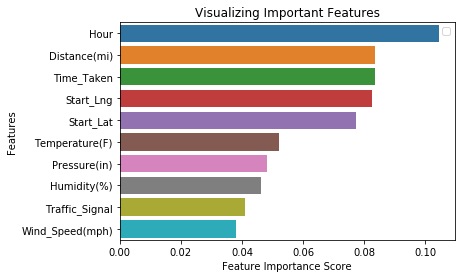

In [102]:
feature_imp = pd.Series(model.feature_importances_,index=df_x.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [103]:
k=50
feature_imp.sort_values(ascending=False)[:k]

Hour                               0.104434
Distance(mi)                       0.083509
Time_Taken                         0.083463
Start_Lng                          0.082740
Start_Lat                          0.077299
Temperature(F)                     0.051974
Pressure(in)                       0.048269
Humidity(%)                        0.046209
Traffic_Signal                     0.041128
Wind_Speed(mph)                    0.038210
Visibility(mi)                     0.020117
County_Cook                        0.018551
Weekday_Sun                        0.015096
Sunrise_Sunset_Day                 0.014541
Weekday_Sat                        0.014504
Sunrise_Sunset_Night               0.013892
Precipitation(in)                  0.011069
Junction                           0.009414
County_DuPage                      0.007676
Weekday_Mon                        0.007499
Weekday_Wed                        0.007488
Weather_Condition_Fair             0.007384
Weekday_Fri                     

In [104]:
#knn
model =  KNeighborsClassifier(n_neighbors=30)
model.fit(X_train,y_train)
y_pred=model.predict(X_valid)
acc=accuracy_score(y_valid, y_pred)
#f1_score = f1_score(y_valid,y_pred,average='micro')
print("acc",acc)


acc 0.7564102564102564


In [81]:
print('F1 Score : ' + str(score(y_valid,y_pred,average='micro')))

F1 Score : 0.7724358974358975


In [105]:
##decison Tree
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_valid)
acc=accuracy_score(y_valid, y_pred)

print("acc",acc)
#print("f1_score",f1_score)

acc 0.7926282051282051


In [106]:
print('F1 Score : ' + str(score(y_valid,y_pred,average='micro')))

F1 Score : 0.7926282051282051


In [107]:
##
model = ExtraTreesClassifier(n_estimators=1000, random_state=0,class_weight='balanced')
model.fit(X_train,y_train)
y_pred=model.predict(X_valid)
acc=accuracy_score(y_valid, y_pred)

print("acc",acc)
print('F1 Score : ' + str(score(y_valid,y_pred,average='micro')))


acc 0.8211538461538461
F1 Score : 0.8211538461538461
